In [71]:
import warnings
import numpy as np
from numpy.linalg import matrix_rank
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Load Data
boston = datasets.load_boston()
print(boston.keys())
print("\nBoston dataset shape: ", boston.data.shape)
print("Boston target shape: ", boston.target.shape)
print("\nFeature names: ", boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Boston dataset shape:  (506, 13)
Boston target shape:  (506,)

Feature names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
# Create Dataframe Object
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df = pd.concat([df, pd.Series(boston.target, name="MEDV")], axis=1)

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


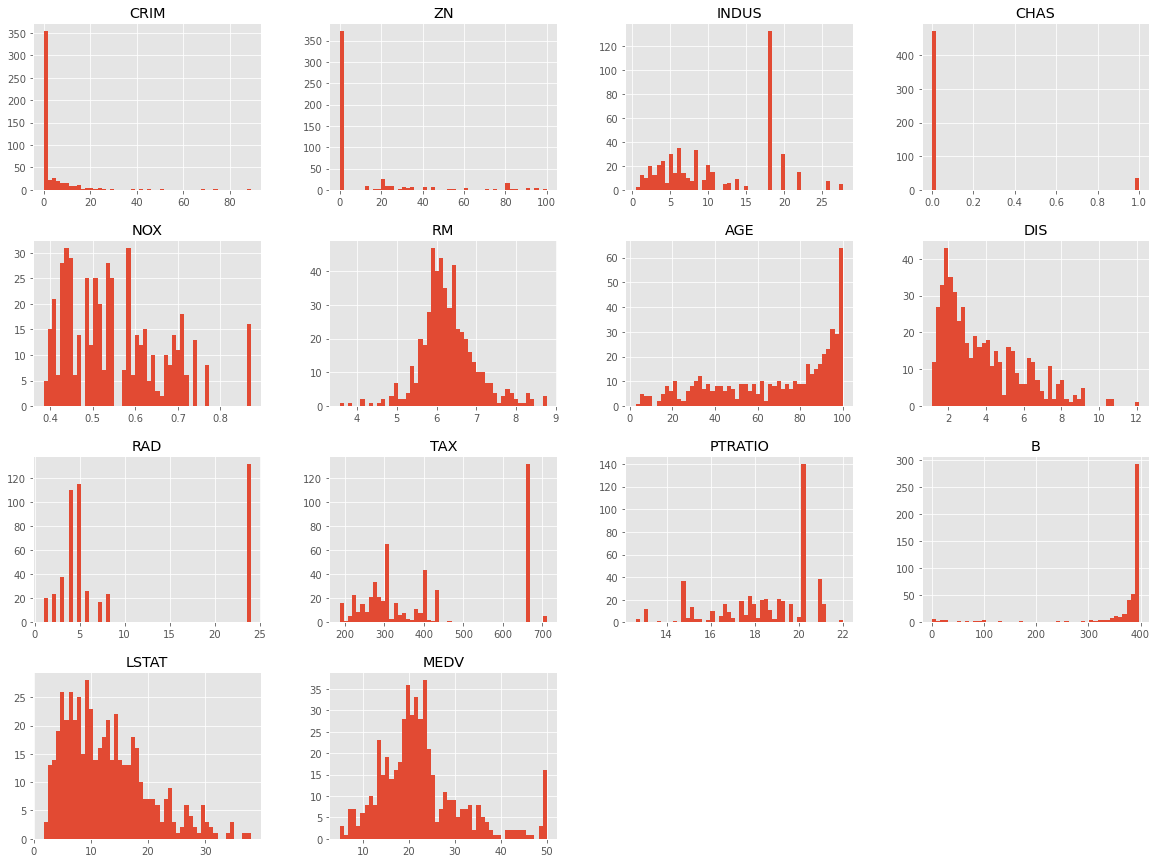

In [16]:
# Visualization of Data

plt.style.use('ggplot')
df.hist(bins=50, figsize=(20,15))
plt.show()

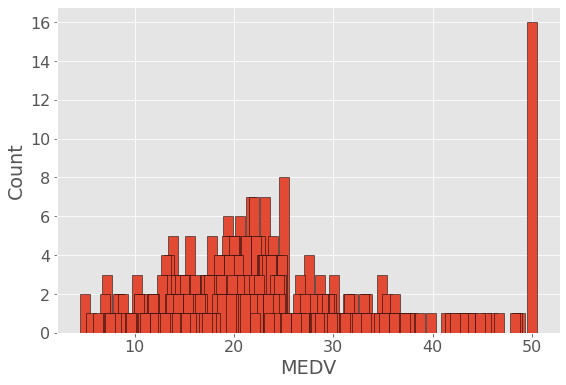

In [39]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9,6)

plt.bar(df['MEDV'].value_counts().index, 
        df['MEDV'].value_counts().values,
        fill = 'navy', edgecolor='k', width=1)
plt.xlabel('MEDV')
plt.ylabel('Count')
#plt.xticks([])
plt.show()

In [40]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [41]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [46]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

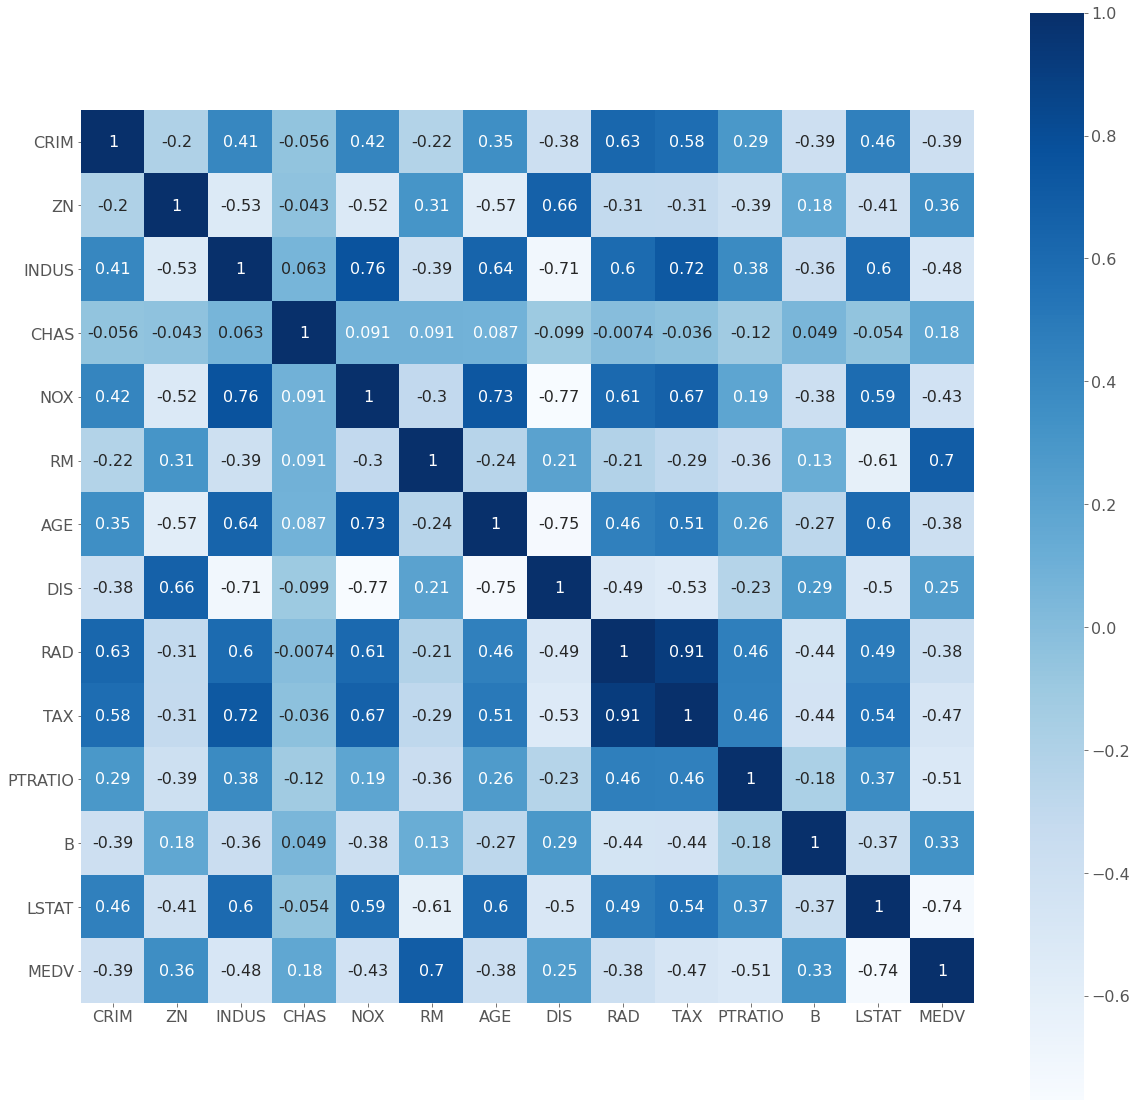

In [53]:
correlation = df.corr()

fig = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')
plt.show()

In [61]:
allData = df.copy()

X = df.drop(columns='MEDV')
y = df['MEDV']

X = np.asarray(X)
y = np.asarray(y)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

X shape:  (506, 13)
y shape:  (506,)

X data type:  float64
y data type:  float64


In [67]:
# Determine Whether the Data Matrix X is Sigular 
print("Rank of X: ", matrix_rank(X))

Rank of X:  13


In [68]:
# Create Train and Test Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Standardize the Feature
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## OLS Method for solving LR

In [75]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

print("Intercept: ", lin_reg.intercept_)
print("Coefficeints: ", lin_reg.coef_)

y_train_predicted = lin_reg.predict(X_train)
print("Training: Mean Squared error: ", mean_squared_error(y_train, y_train_predicted))
print("Training: r^2 variance error: ", r2_score(y_train, y_train_predicted))

Intercept:  22.796534653465375
Coefficeints:  [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
Training: Mean Squared error:  21.641412753226316
Training: r^2 variance error:  0.7508856358979672


In [76]:
# Evaluation of the model on Testing
y_test_predicted = lin_reg.predict(X_test)

print("Testing: Mean Squared error: ", mean_squared_error(y_test, y_test_predicted))
print("Testing: r^2 variance error: ", r2_score(y_test, y_test_predicted))

Testing: Mean Squared error:  24.291119474973517
Testing: r^2 variance error:  0.668759493535632
